In [ ]:
using CSV, DataFrames, PlotlyJS, WebIO, Statistics

In [4]:
# Change directory to CSV file
cd("exploration")

In [5]:
# Read CSV and store into data frame
res = CSV.File("HBEC samples for heatmap.csv");
df = res |> DataFrame
first(df,6)

,Plate_2BLBEA2A25,Column2,Column3,Column4,Column5,Column6
,String15,String15?,String31?,String31?,String15,String7
1,Sample,Material,Flaming/Smoldering,Exp Concentration,Assay,Well
2,53K,CB,F,1ug,IFN-?,D07
3,53K,CB,F,1ug,IFN-?,D08
4,53K,CB,F,1ug,IFN-?,D09
5,63O,CB,F,1ug,IFN-?,G07
6,63O,CB,F,1ug,IFN-?,G08


In [6]:
curnames = strip.(names(df));

In [7]:
nn = values(df[1,:])          # Pull values not df
nn = strip.(nn)               # Remove spaces at the beginning and end
nn = replace.(nn," " => "_")  # Replace space in niddle by "_"
nn = replace.(nn,"/" => "_")  # Replace '/' in niddle by "_"
nn = replace.(nn,"." => "_") 

("Sample", "Material", "Flaming_Smoldering", "Exp_Concentration", "Assay", "Well", "Calc_Concentration_Real", "Signal", "Calc__Concentration")

In [8]:
names_set = [ (nn[i],curnames[i]) for i in 1:length(names(df)) ]
for i in names_set
    rename!(df,i[2] => i[1])
end


In [9]:
df = df[2:end,:]
#df = dropmissing(df)
first(df,6)

,Sample,Material,Flaming_Smoldering,Exp_Concentration,Assay,Well,Calc_Concentration_Real
,String15,String15?,String31?,String31?,String15,String7,String31
1,53K,CB,F,1ug,IFN-?,D07,0.08656775
2,53K,CB,F,1ug,IFN-?,D08,#VALUE!
3,53K,CB,F,1ug,IFN-?,D09,0.256362446
4,63O,CB,F,1ug,IFN-?,G07,1.825374766
5,63O,CB,F,1ug,IFN-?,G08,2.02573607
6,63O,CB,F,1ug,IFN-?,G09,2.143486684


In [10]:
# Replace 1ug by 01ug and 5ug by 05ug so I can sort it
c1 = df.Exp_Concentration
replace!(c1,"1ug" => "01ug")
replace!(c1,"5ug" => "05ug");
df.Exp_Concentration = c1;


In [11]:
# Replace #VALUE! by "0"
conc_real = values(df[:,:Calc_Concentration_Real])
conc_real = replace.(conc_real,"#VALUE!" => "0")     # Need to check if the value can be set to zero
df[!,:Conc_real] = parse.(Float64,conc_real);
#first(df[!,:Conc_real],10)

## Get the average control concentration value for the samples

In [12]:
df_ctlr = df[contains.(df.Sample,"Ctrl"),:]
gdf = groupby(df_ctlr, [:Sample, :Assay])
mean_ctrl = combine(gdf, :Conc_real => mean)
first(mean_ctrl,6)

,Sample,Assay,Conc_real_mean
,String15,String15,Float64
1,21O Ctrl,IFN-?,0.0270836
2,21O Ctrl,IL-10,0.324307
3,21O Ctrl,IL-12p70,0.0897118
4,21O Ctrl,IL-13,22.443
5,21O Ctrl,IL-1?,1.71029
6,21O Ctrl,IL-2,0.60224


In [13]:
layout = Layout(autosize=true, height=600,margin=attr(l=0, r=0, b=0, t=65));

In [14]:
function showHM_perGrp(grp)
    dfx = df[df.Sample .== grp,:]
    dfx[!,:C] = string.(dfx.Material,"_",dfx.Flaming_Smoldering,"_",dfx.Exp_Concentration);
    PlotlyJS.plot(PlotlyJS.heatmap(x=dfx.Assay,y=dfx.C,z=dfx.Conc_real),layout)
end

showHM_perGrp (generic function with 1 method)

In [36]:
function showHM_perGrp_perEssay(grp,assay)
    dfx = df[df.Sample .== grp,:]
    dfx[!,:C] = string.(dfx.Material,"_",dfx.Flaming_Smoldering,"_",dfx.Exp_Concentration);
    dfy = dfx[dfx.Assay .== assay,:]
    sort!(dfy,[order(:C)])
    PlotlyJS.plot(PlotlyJS.heatmap(x=dfy.Assay,y=dfy.C,z=dfy.Conc_real),layout)
end

showHM_perGrp_perEssay (generic function with 1 method)

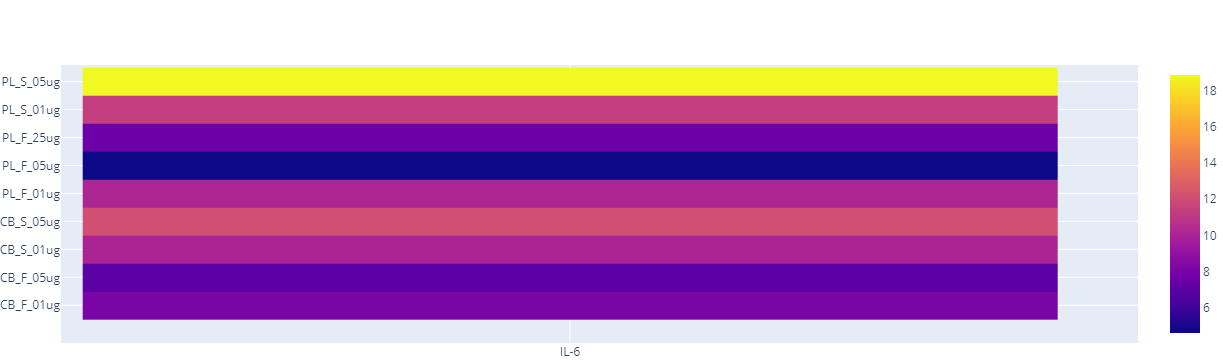

In [93]:
showHM_perGrp_perEssay("63O","IL-6")

In [15]:
function showHM_All()
    dfx = df
    dfx[!,:C] = string.(dfx.Sample,"_",dfx.Material,"_",dfx.Flaming_Smoldering,"_",dfx.Exp_Concentration);
    PlotlyJS.plot(PlotlyJS.heatmap(x=dfx.Assay,y=dfx.C,z=dfx.Conc_real),layout)
end

showHM_All (generic function with 1 method)

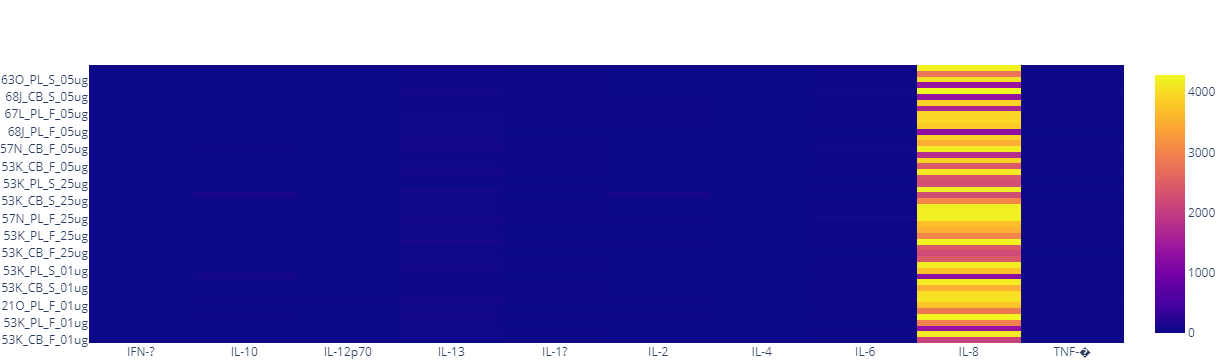

In [48]:
showHM_All()

In [14]:
unique(df.Sample)

6-element Vector{String15}:
 "53K"
 "63O"
 "68J"
 "21O"
 "57N"
 "67L"

## 53K

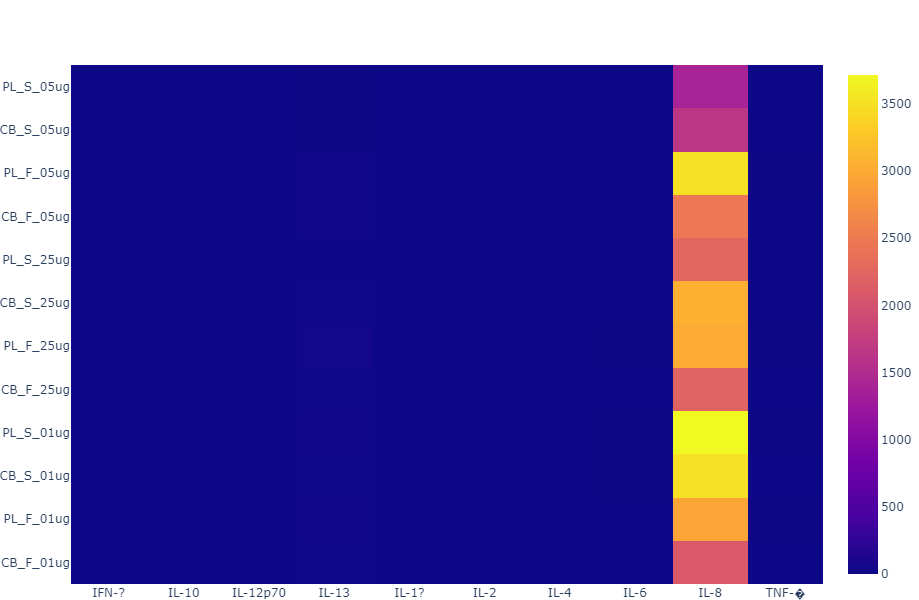

In [49]:
showHM_perGrp("53K")

## 63O

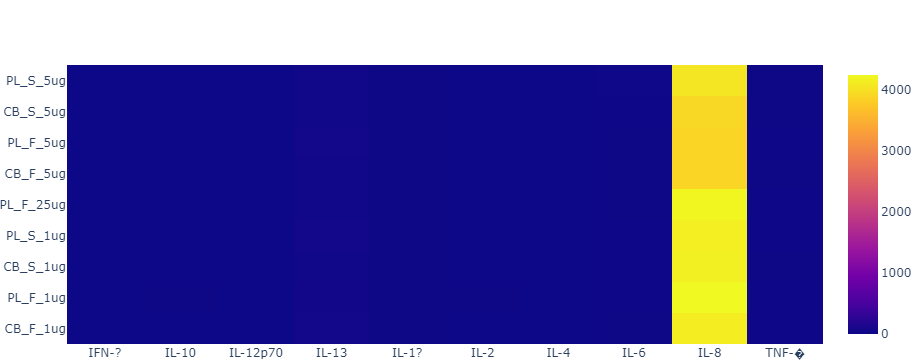

In [16]:
showHM_perGrp("63O")

## 68J

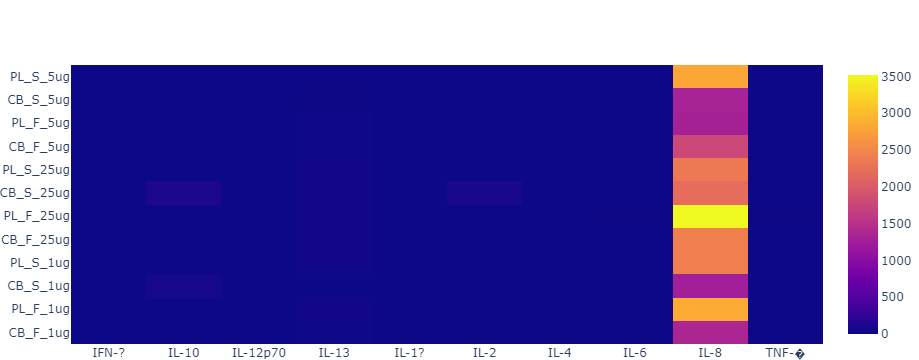

In [17]:
showHM_perGrp("68J")

## 21O

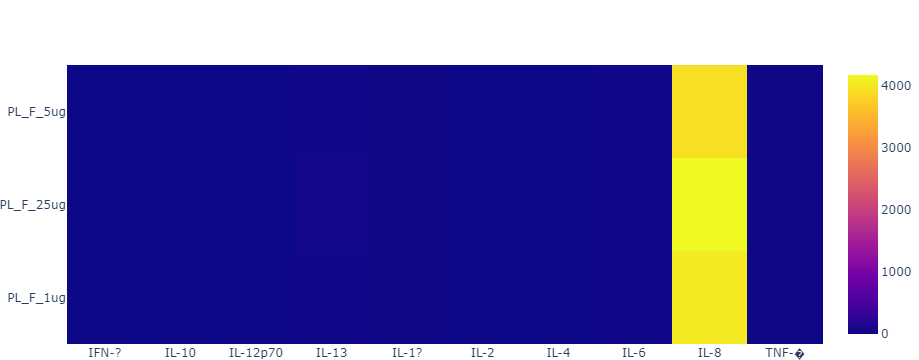

In [20]:
showHM_perGrp("67L")

## 57N

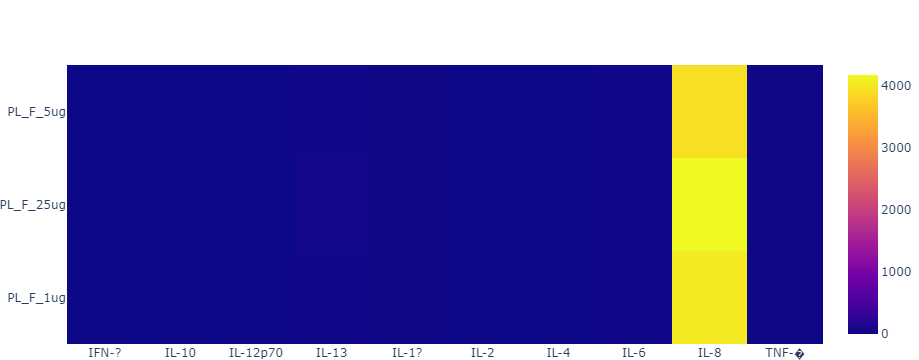

In [20]:
showHM_perGrp("67L")

## 67L

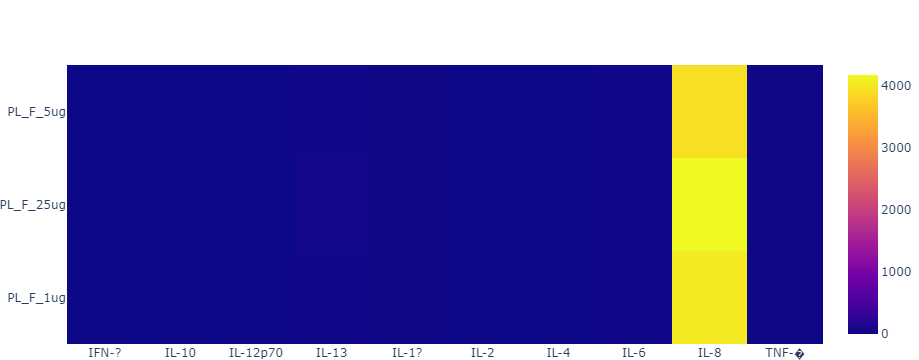

In [20]:
showHM_perGrp("67L")

In [50]:
dtest = df[df.Conc_real .> 1 .&& df.Sample .== "67L",[:Sample,:Conc_real,:Assay,:Material,:Flaming_Smoldering]]
first(dtest,6)

,Sample,Conc_real,Assay,Material,Flaming_Smoldering
,String15,Float64,String15,String15,String31
1,67L,1.36556,IFN-?,PL,F
2,67L,1.71803,IFN-?,PL,F
3,67L,1.34689,IFN-?,PL,F
4,67L,1.44925,IL-10,PL,F
5,67L,1.53691,IL-10,PL,F
6,67L,2.55277,IL-10,PL,F


In [16]:
# Get all assay
unique(df.Assay)

10-element Vector{String15}:
 "IFN-?"
 "IL-10"
 "IL-12p70"
 "IL-13"
 "IL-1?"
 "IL-2"
 "IL-4"
 "IL-6"
 "IL-8"
 "TNF-\xe0"

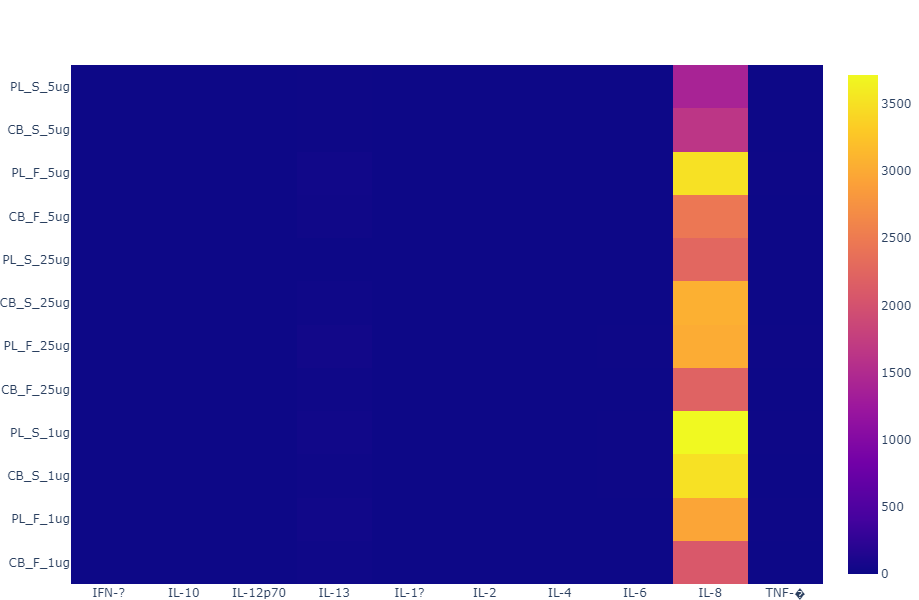

In [32]:
showHM_perGrp("53K")